/Users/lhoms/Library/Python/3.9/lib/python/site-packages/IPython/core/interactiveshell.py:3169: DtypeWarning: Columns (11) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


<AxesSubplot:title={'center':'Muertes por edad'}, xlabel='edad'>

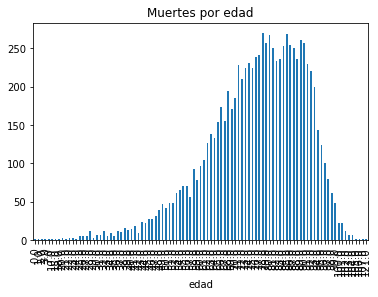

In [5]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

import os

filePath = "/Users/lhoms/dev/UTN/Procesamiento de señales/05-Procesamiento-de-Se-ales/dataset_casos_covid_CABA.csv"
casos = pd.read_csv(filePath, parse_dates=['fecha_fallecimiento'])

casos['fecha_fallecimiento'] = pd.to_datetime(casos['fecha_fallecimiento'], format='%d%b%Y:%H:%M:%S.%f')
#casos.head()
sub = casos[["edad", "fecha_fallecimiento"]]
df = sub.dropna().groupby(['edad']).size()
#print(df)
df.plot(kind="bar", title="Fallecimientos por edad")

In [6]:
countList = sub.dropna().groupby(['edad']).size().reset_index(name='counts')
top = countList.sort_values("counts", ascending=False)
print("Top 5 mas fallecidos por edad")
top.head()

Top 5 mas muertes por edad


,edad,counts
66,78.0,270
73,85.0,269
68,80.0,267
77,89.0,261
67,79.0,257


In [7]:
descTop = countList.sort_values("counts", ascending=True)
print("Top 5 menos fallecidos por edad")
descTop.head()

Top 5 menos muertes por edad


,edad,counts
96,121.0,1
1,1.0,1
2,2.0,1
3,3.0,1
4,7.0,1


<AxesSubplot:title={'center':'Muertes por ser o no edad de riesgo'}, ylabel='None'>

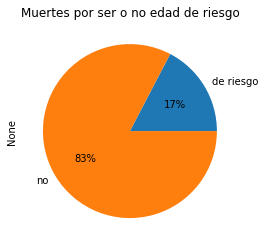

In [18]:
# Riesgo vs no riesgo. (+60)

def esDeRiesgo(edad):
    if edad >= 60:
        return 'de riesgo'
    else:
        return 'no'

casos['de_riesgo'] = casos.apply(lambda x: esDeRiesgo(x['edad']), axis=1)
sub = casos[['de_riesgo']]
df = sub.dropna().groupby(['de_riesgo']).size()

df.plot(kind="pie", title="Fallecidos por ser o no edad de riesgo", autopct='%1.f%%')

<AxesSubplot:title={'center':'Muertes por genero'}, ylabel='None'>

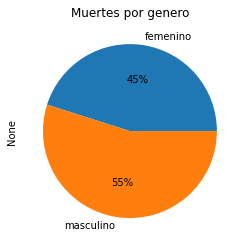

In [13]:
# Genero
sub = casos[["genero", "fecha_fallecimiento"]]
df = sub.dropna().groupby(['genero']).size()
#print(df)
df.plot(kind="pie", title="Fallecidos por genero", autopct='%1.f%%')